# Finding the Best Markets to Advertise In

I will pretend I am working for an e-learning company that offers courses in programming. Most of the courses are on web and mobile development, but there are also courses in domains such as data science, game development, etc. The company wants to promote their product and invest money in advertising. The goal of this project is to find the best two markets to advertise the product in.

To reach our goal, we will use data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969), which is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [110]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
survey.shape

(18175, 136)

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:
- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So first we need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes the role(s) each participant is interested in working in. So I will analyze the JobRoleInterest frequency distribution table.

In [112]:
survey['JobRoleInterest'].value_counts()

Full-Stack Web Developer                                                                                                                                                                                                    823
  Front-End Web Developer                                                                                                                                                                                                   450
  Data Scientist                                                                                                                                                                                                            152
Back-End Web Developer                                                                                                                                                                                                      142
  Mobile Developer                                                                                      



From a quick scan, we can tell:
- A lot of people are interested in web development
- A few people are interested in mobile development.
- A few people are interested in other domains.

Many respondants also answered more than one domain. In this next code block, I will split the different domains and determine the relative number of people interested in one, two, ... domains.

In [113]:
interest_no_nulls = survey['JobRoleInterest'].dropna()
interest_splitted = interest_no_nulls.str.replace(' ', '').str.split(',')
num_interests = interest_splitted.apply(lambda x: len(x))
num_interests.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of respondants are interested in one particular domain, while the vast majority of respondants have mixed interests. The focus of our courses is on web and mobile development, so I will find out how many respondents chose at least one of these two options.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


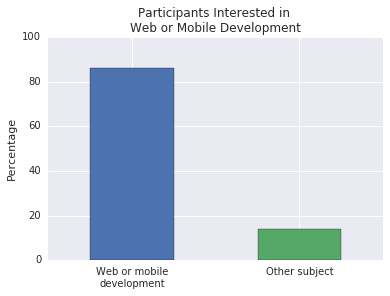

In [114]:
web_mobile = interest_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_mobile.value_counts(normalize=True) * 100
print(freq_table)


import matplotlib.pyplot as plt
%matplotlib inline

freq_table.plot.bar()
plt.title('Participants Interested in \nWeb or Mobile Development')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'], rotation=0) 
plt.ylabel('Percentage')
plt.ylim([0,100])
plt.show()



86% of respondants are interested in web or mobile development. Because we want to advertise our services to people interested in mainly web and mobile development but also other domains, this sample should be representative of our population of interest.

## Analysis

We will start with finding where these new coders are located, and what are the densities for each location. We will use the CountryLive variable to find out where the coders live. Because the dataset provides location information at a country level, we can think of each country as an individual market, and frame our goal as finding the two best countries to advertise in. These will be the two countries with the highest number of potential customers.

In [115]:
country_freq_abs = survey['CountryLive'].value_counts()
country_freq_rel = survey['CountryLive'].value_counts(normalize=True) * 100

print('Absolute frequency table:\n', country_freq_abs.head(10))
print('Relative frequency table:\n', country_freq_rel.head(10))

Absolute frequency table:
 United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Germany                      324
Poland                       265
Russia                       263
Australia                    259
France                       228
Name: CountryLive, dtype: int64
Relative frequency table:
 United States of America    37.760824
India                        9.128847
United Kingdom               4.936098
Canada                       4.016693
Brazil                       2.373500
Germany                      2.112676
Poland                       1.727960
Russia                       1.714919
Australia                    1.688837
France                       1.486698
Name: CountryLive, dtype: float64


The 5791, or 37.8%, of the respondants are from the United States. 1400, or 9.12% of the respondants are from India. All of the other countries comprise < 5% of the respondants. The two countries with the highest number of potential customers are the USA and India.

We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising in markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in USD the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [116]:
# Create new column, SpendPerMonth, by diving total amount spent on learning by months spent programming
survey['MonthsProgramming'].replace(0,1, inplace=True) #replace 0 by 1 to avoid dividing by 0
survey['SpendPerMonth'] = survey['MoneyForLearning'] / survey['MonthsProgramming']
survey['SpendPerMonth'].isnull().sum()

1995

In [117]:
survey = survey[survey['SpendPerMonth'].notnull()]

In [118]:
survey = survey[survey['CountryLive'].notnull()]

In [119]:
countries_avg = survey.groupby('CountryLive').mean()
countries_avg['SpendPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]


CountryLive
United States of America    206.297711
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Name: SpendPerMonth, dtype: float64

The United States spends the most money, with Canada coming in second. India spends more money on average than our subscription costs, however it is only $7 more than the subscription price so they may not have money left over. This number may also be affected by outliers and the majority of people in India don't spend as much as our subscription costs.

I will create box plot to look for outliers.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



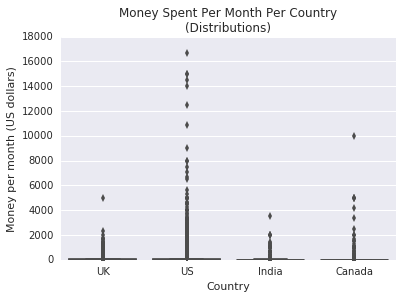

In [125]:
four_countries = survey[survey['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y = 'SpendPerMonth', x = 'CountryLive',
            data = four_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['UK', 'US', 'India', 'Canada']) 
plt.show()



In [126]:
# Eliminate extreme outliers
survey = survey[survey['SpendPerMonth'] < 20000]

In [127]:
countries_avg = survey.groupby('CountryLive').mean()
countries_avg['SpendPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]


CountryLive
United States of America    158.919644
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Name: SpendPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



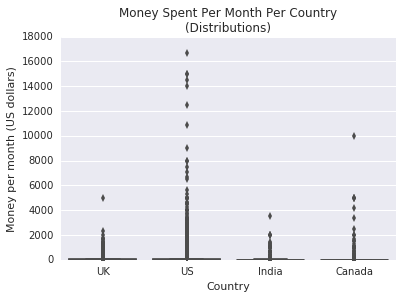

In [128]:
sns.boxplot(y = 'SpendPerMonth', x = 'CountryLive',
            data = four_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['UK', 'US', 'India', 'Canada']) 
plt.show()

In [129]:
four_countries['CountryLive'].value_counts(normalize=True) * 100

United States of America    68.642471
India                       15.333417
United Kingdom               8.765541
Canada                       7.258571
Name: CountryLive, dtype: float64

The US is guarenteed to be the best country to advertise in, because they have the highest percentage of respondants and spend the most money. 

Even though Canada spends more per month than India on average, people in India still spend on average \$66 USD, which is more than the price of our subscription at \$59 USD. Since they have twice the amount of potential customers as the UK and Canada, I feel that India is the second best country to advertise in.

However, since the US has by far the most potential customers and spends the most money, our advertising budget may be better spent advertising only in the US. I was not schooled in marketing, though, so I will send over all the data to the marketing team and let them decide the best path forward.